In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv('data.csv', sep=',')

In [22]:
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [23]:
#Оставим только тех сотрудников, у которых количество больничных дней больше 2
data = data[data["Количество больничных дней"] > 2]

In [27]:
#Добавим в Dataframe столбец IsOld
data["IsOld"] = data["Возраст"] > 35

In [43]:
data["IsOld"] = data["IsOld"].map({True: 1, False: 0})

In [31]:
#Выведем статистику по количеству больничных дней
data["Количество больничных дней"].describe()

count    151.000000
mean       4.291391
std        1.383664
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: Количество больничных дней, dtype: float64

In [29]:
#Найдем долю сотрудников каждого пола
data["Пол"].value_counts(normalize=True)

Пол
М    0.556291
Ж    0.443709
Name: proportion, dtype: float64

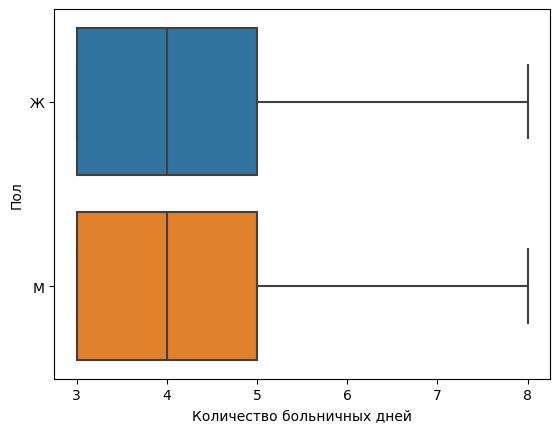

In [24]:
#Построим отдельные boxplot для разных полов
sns.boxplot(x="Количество больничных дней", y="Пол", data=data);

Из графика видно, что у обоих полов совпадают все 4 квартиля

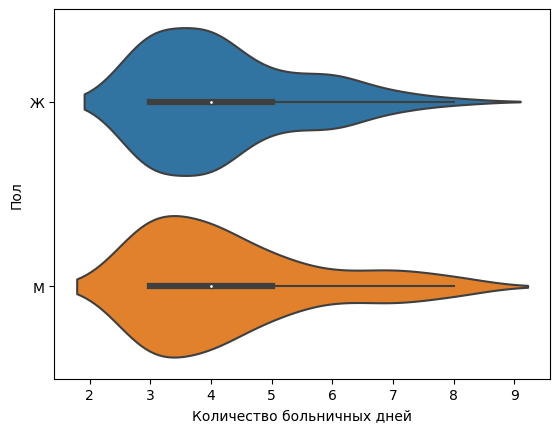

In [25]:
#Построим отдельные violinplot для разных полов
sns.violinplot(x="Количество больничных дней", y="Пол", data=data, split=True);

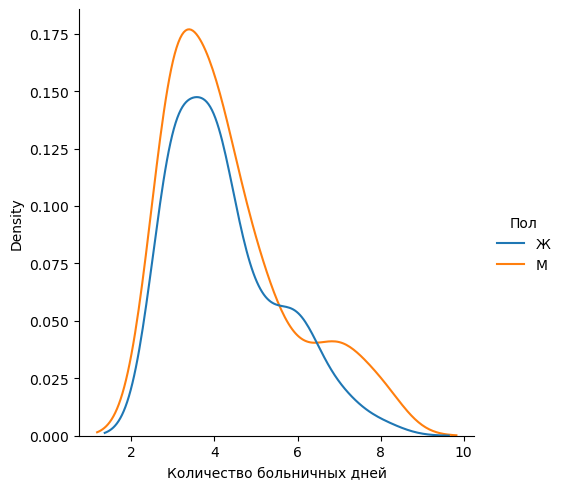

In [35]:
#Построим график распределения количество больничных дней по полам
sns.displot(x="Количество больничных дней", data=data, kind="kde", hue="Пол");

In [11]:
women = data[(data["Пол"] == "Ж")]
men = data[(data["Пол"] == "М")]

H_0: Количество больничных дней у мужчин и женщин имеет одинаковое распределение
H_1: Количество больничных дней у мужчин и женщин имеет разное распределение
Определим уровень значимости 0.05

In [12]:
#Проведем t-test
ttest_ind(women['Количество больничных дней'], men['Количество больничных дней'])

TtestResult(statistic=-0.41592499748510986, pvalue=0.67806332103283, df=149.0)

p-value оказался больше, чем уровень значимости, поэтому мы не можем отклонить нулевую гипотезу

In [34]:
#Найдем долю сотрудников каждой возрастной группы
data["IsOld"].value_counts(normalize=True)

IsOld
True     0.761589
False    0.238411
Name: proportion, dtype: float64

In [ ]:
#Построим отдельные boxplot для каждой возрастной группы
sns.boxplot(x="Количество больничных дней", y="IsOld", data=data);

In [45]:
old = data[data["IsOld"] == 1]
young = data[data["IsOld"] == 0]

In [14]:
ttest_ind(old['Количество больничных дней'], young['Количество больничных дней'])

TtestResult(statistic=-0.7594348478395395, pvalue=0.4487922957971878, df=149.0)